In [1]:
import msc_project.utils.plot_utils as pu
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
PATH_TEST33 = '/scratch/msc24h18/msc_project/results/test33/'
PATH_TEST54 = '/scratch/msc24h18/msc_project/results/test54/'

In [6]:
# class to simulate argparse argument object. will return None for any attribute that is not set
class Args:
    def __init__(self):
        self.aspect = 'auto'
        self.scale = 'linear'
    def __getattr__(self, name):
        return None

/scratch/msc24h18/msc_project/src/msc_project/utils/plot_utils.py:375: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


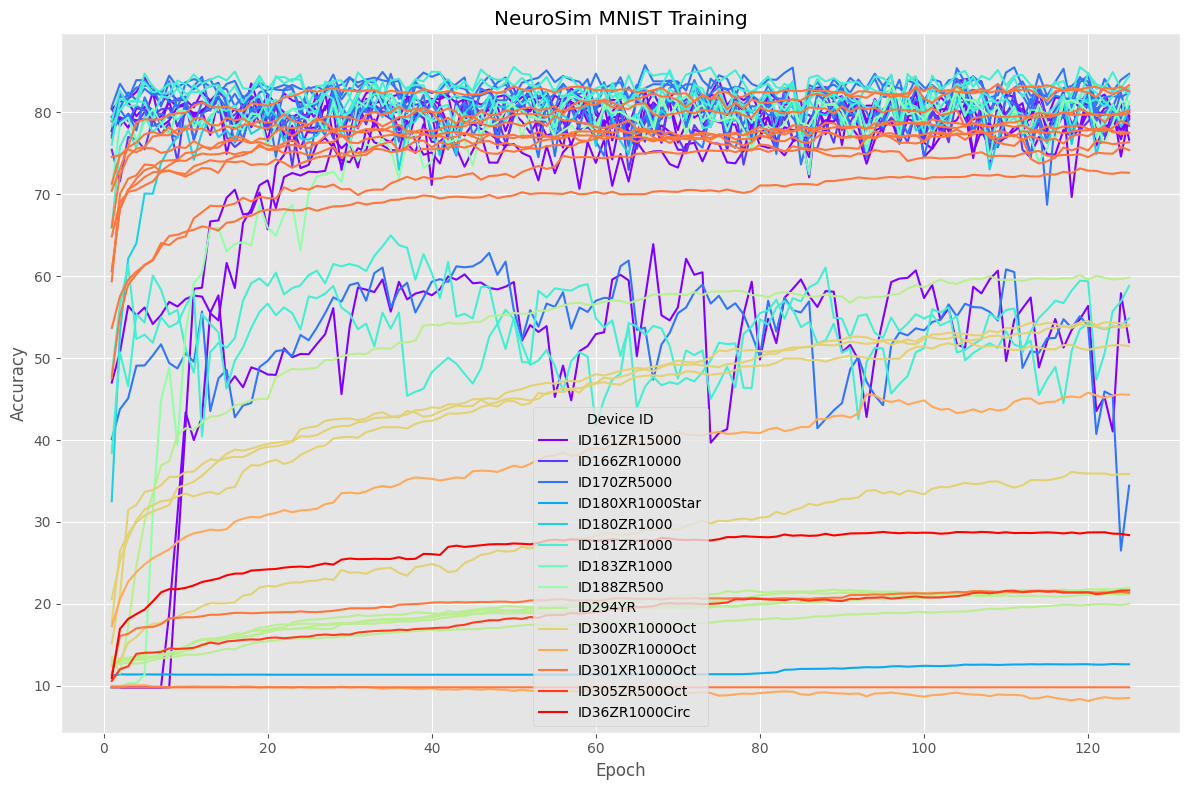

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

args = Args()
args.input = PATH_TEST33 + 'run_1/neurosim'
args.y = 'accuracy'
args.hue = 'device_id'
args.huelabel = "Device ID"
pu._plot_epochs(fig, ax, args)
ax.set(xlabel='Epoch', ylabel='Accuracy', title='NeuroSim MNIST Training')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title=args.huelabel, loc='lower center')
plt.tight_layout()
plt.savefig('../neurosim_accuracy_epochs.png')
plt.show()

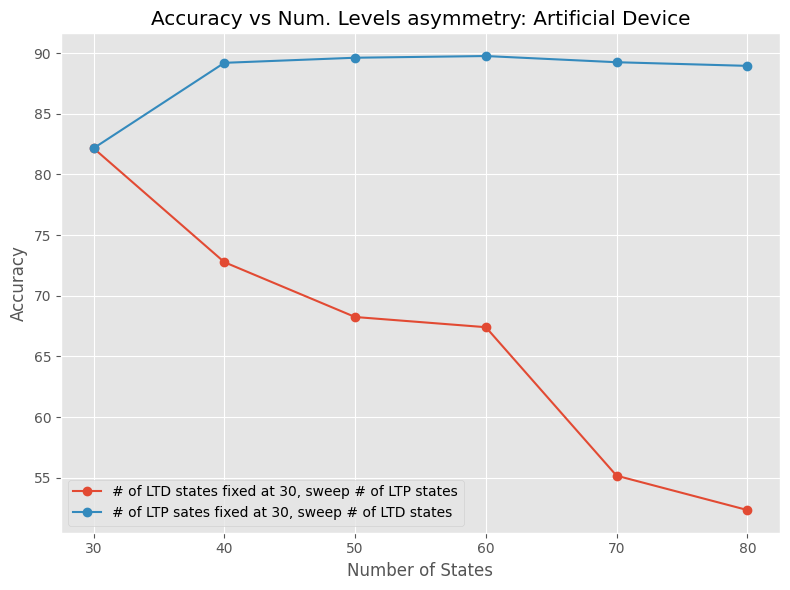

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

data = pu.read_average_data(PATH_TEST54)

sweep_ltp = data[data['val1'] == 30]
sweep_ltd = data[data['val2'] == 30]

ax.plot(sweep_ltp['val2'], sweep_ltp['accuracy'], label='# of LTD states fixed at 30, sweep # of LTP states', marker='o')
ax.plot(sweep_ltd['val1'], sweep_ltd['accuracy'], label='# of LTP sates fixed at 30, sweep # of LTD states', marker='o')
ax.legend()
ax.set(xlabel='Number of States', ylabel='Accuracy', title='Accuracy vs Num. Levels asymmetry: Artificial Device')
plt.tight_layout()
plt.savefig('../neurosim_accuracy_numlevel_asymmetry.png')
plt.show()